# Import Libraries

In [72]:
!pip install -r requirements.txt -q

In [122]:
# Datahandling
import requests
import os
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
import xgboost as xgb


# Data

In [74]:
# Data import 
data = pd.read_csv('TwitterData_Joined.csv')

In [75]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
data.head(15)

First few rows of the dataset:


Twitter_User_Name Twitter_Account  \
0         Museum Bot       MuseumBot   
1         Museum Bot       MuseumBot   
2         Museum Bot       MuseumBot   
3         Museum Bot       MuseumBot   
4         Museum Bot       MuseumBot   
5         Museum Bot       MuseumBot   
6         Museum Bot       MuseumBot   
7         Museum Bot       MuseumBot   
8         Museum Bot       MuseumBot   
9         Museum Bot       MuseumBot   
10        Museum Bot       MuseumBot   
11        Museum Bot       MuseumBot   
12        Museum Bot       MuseumBot   
13        Museum Bot       MuseumBot   
14        Museum Bot       MuseumBot   

                             Twitter_User_Description      Tweet_id  \
0   I am a bot that tweets a random high-res Open ...  8.027580e+17   
1   I am a bot that tweets a random high-res Open ...  8.746920e+17   
2   I am a bot that tweets a random high-res Open ...  6.983900e+17   
3   I am a bot that tweets a random high-res Open ...  6.976650e+17   
4   I am a bot that tweets a random high-res Open ...  6.217450e+17   
5   I am a bot that tweets a random high-res Open ...  8.783910e+17   
6   I am a bot that tweets a random high-res Open ...  8.852010e+17   
7   I am a bot that tweets a random high-res Open ...  6.618790e+17   
8   I am a bot that tweets a random high-res Open ...  5.573150e+17   
9   I am a bot that tweets a random high-res Open ...  5.355720e+17   
10  I am a bot that tweets a random high-res Open ...  7.650690e+17   
11  I am a bot that tweets a random high-res Open ...  7.715920e+17   
12  I am a bot that tweets a random high-res Open ...  6.429450e+17   
13  I am a bot that tweets a random high-res Open ...  6.450130e+17   
14  I am a bot that tweets a random high-res Open ...  6.740040e+17   

    Tweet_created_at                                         Tweet_text  \
0   27-11-2016 06:15  Imperial Theatrical Coat for Court Lady https:...   
1   13-06-2017 18:15  Half-length Figure of St Paul in an Oval. http...   
2   13-02-2016 06:15  Great Exhibition Jurors&amp;#39; Medal https:/...   
3   11-02-2016 06:15  Pair of candelabra https://t.co/KYopSWDSw2 htt...   
4   16-07-2015 18:15  Banner (Nobori)\n http://t.co/yz34Xgo9a5 http:...   
5   23-06-2017 23:15  A Small Piece of Turf https://t.co/Yucl869j6X ...   
6   12-07-2017 18:15  Finger ring https://t.co/qAJhdi4VCG https://t....   
7   04-11-2015 12:15  Ornaments https://t.co/WnUMY17C9w https://t.co...   
8   19-01-2015 23:15  Lady Maria Conyngham (died 1843) http://t.co/I...   
9   20-11-2014 23:15  Frame http://t.co/9hsuSqDCah http://t.co/JYWtW...   
10  15-08-2016 06:15  Piece https://t.co/fS64spFNgf https://t.co/9MJ...   
11  02-09-2016 06:15  [House with Palm Tree] https://t.co/8FLyTU3Tcc...   
12  13-09-2015 06:15  Oval dish http://t.co/H8sWZuTkZI http://t.co/B...   
13  18-09-2015 23:15  Serving spoon http://t.co/VI8zaSXorf http://t....   
14  07-12-2015 23:15  Penitent Saint Jerome https://t.co/4gPTzAtHUZ ...   

    Label  Word_Count  Url_Count  Retweet  ... Adverb_Count  \
0       0           8          2        0  ...            0   
1       0          10          2        0  ...            0   
2       0           6          2        0  ...            0   
3       0           5          2        0  ...            0   
4       0           4          2        0  ...            0   
5       0           7          2        0  ...            0   
6       0           4          2        0  ...            0   
7       0           3          2        0  ...            0   
8       0           7          2        0  ...            0   
9       0           3          2        0  ...            0   
10      0           3          2        0  ...            0   
11      0           6          2        0  ...            0   
12      0           4          2        0  ...            0   
13      0           4          2        0  ...            0   
14      0           5          2        0  ...            0   

    Positive_Wo

In [76]:
import pandas as pd
import re

# Antager at du allerede har importeret datasættet som 'data'
# Hvis datasættet er importeret som 'data', kan du fortsætte direkte fra her

# Funktion til at finde URL'er i tekst
# Opdateret regex for at finde mere generelle URL'er
def find_urls(text):
    # Regular expression til at finde URL'er, som kan inkludere både http(s) og uden http
    url_pattern = r'(\b(?:https?://|www\.)[a-zA-Z0-9-_.]+\.[a-zA-Z]{2,}\b(?:[^\s]*))'
    return re.findall(url_pattern, text)

# Find alle URL'er i Tweet-kolonnen
urls = data['Tweet_text'].apply(find_urls)

# Saml alle URL'er i en liste
all_urls = [url for sublist in urls for url in sublist]

# Fjern duplikater
unique_urls = list(set(all_urls))

# Udskriv listen med unikke URL'er
print(unique_urls)



['https://t.co/Seh6k5oUf0', 'http://t.co/vtOdpk0Wxh\\n#Thegigglinggene', 'http://t.co/wW7E3xrohJ', 'https://t.co/dLBdmfKMmp', 'https://t.co/UqhbsxwheZ', 'http://t.co/At1mfERRPo', 'http://t.co/xfrNZZKfiO', 'https://t.co/mVfDCdYOyR', 'https://t.co/AFuE0D86Pu', 'https://t.co/0FfIpeRF9Z', 'https://t.co/7QTDKEjVMx', 'http://t.co/meyOJtWQ', 'https://t.co/Of4ZyyEpHx', 'https://t.co/sVQW3RhZsf', 'https://t.co/Sm81x8WNKp', 'https://t.co/hNUUOOItxR', 'https://t.co/jKlBwCVET0', 'http://t.co/htnuwKJdP9', 'http://bit.ly/3KFbmK', 'https://t.co/iuITrvfc4a', 'http://t.co/es0zpaaHlQ', 'https://t.co/txTAevaams', 'https://t.co/7uy2sSqAUq', 'https://t.co/d0QOMYb3xT', 'https://t.co/8xkMvn4YWP', 'https://t.co/QowLEhXRCd', 'https://t.co/2NKiYtsgGp', 'https://t.co/moYDrPdBkj', 'https://t.co/V2BxXcqDhi', 'https://t.co/ZguYFdetwY', 'https://t.co/b0X7C3bJt5', 'http://t.co/7kdsV5egIy', 'https://t.co/waeNWlnwQY', 'https://t.co/knL5M94DWM', 'http://t.co/C7XGOd0gcI', 'https://t.co/FEQFnAQsQW', 'http://t.co/WAIARTKIi

In [77]:
data.Label.value_counts()

Label
1    144224
0    135467
Name: count, dtype: int64

In [78]:
# Display basic information about the dataset
print("\nBasic information about the dataset:")
print(data.info())


Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279691 entries, 0 to 279690
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Twitter_User_Name         279691 non-null  object 
 1   Twitter_Account           279691 non-null  object 
 2   Twitter_User_Description  276027 non-null  object 
 3   Tweet_id                  279691 non-null  float64
 4   Tweet_created_at          279691 non-null  object 
 5   Tweet_text                279691 non-null  object 
 6   Label                     279691 non-null  int64  
 7   Word_Count                279691 non-null  int64  
 8   Url_Count                 279691 non-null  int64  
 9   Retweet                   279691 non-null  int64  
 10  Original_User             58391 non-null   object 
 11  Mentions_Count            279691 non-null  int64  
 12  Hashtags_Count            279691 non-null  int64  
 13  QuesMa

In [138]:
data = pd.read_csv('TwitterData_Joined.csv')
data = data.sample(n=5000, random_state=19)

In [82]:
# -------------------------------------------------
# Dropping Constant features and non-numeric values
# -------------------------------------------------
data = data.copy()
data = data.select_dtypes(include=['int64', 'float64'])
constant_columns = data.columns[data.nunique() == 1]
sml_data = data.drop(columns=constant_columns)
sml_data

Tweet_id  Label  Word_Count  Url_Count  Retweet  Mentions_Count  \
20383   7.180750e+17      0           7          0        0               0   
102418  1.071630e+18      1          23          0        1               2   
277786  8.453450e+17      1          21          0        1               0   
242954  5.406010e+17      0          12          1        0               0   
187582  7.496720e+17      1          20          0        0               3   
...              ...    ...         ...        ...      ...             ...   
15421   1.070920e+18      0          15          0        0               0   
9432    8.693420e+17      0           2          0        0               1   
100670  8.623520e+17      0           1          1        0               0   
7883    1.033440e+18      0          18          1        1               0   
21055   6.702270e+17      0           7          0        0               0   

        Hashtags_Count  QuesMark_Count  Exclamations_Count  \
20383                0               0                   0   
102418               1               0                   0   
277786               1               0                   0   
242954               0               0                   0   
187582               0               0                   0   
...                ...             ...                 ...   
15421                0               1                   0   
9432                 0               0                   0   
100670               0               0                   0   
7883                 0               0                   0   
21055                0               0                   0   

        SpecialCharacters_Count  ...  Pronouns_Count  Verb_Count  \
20383                         1  ...               0           1   
102418                       10  ...               0           3   
277786                        9  ...               0           1   
242954                        1  ...               0           0   
187582                        3  ...               0           2   
...                         ...  ...             ...         ...   
15421                        24  ...               0           0   
9432                          2  ...               0           0   
100670                        0  ...               0           0   
7883                          5  ...               0           2   
21055                         1  ...               0           1   

        Adverb_Count  Positive_Word_Ratio  Negative_Word_Ratio  \
20383              0             0.125000             0.000000   
102418             1             0.066667             0.033333   
277786             0             0.066667             0.000000   
242954             0             0.071429             0.000000   
187582             1             0.086957             0.000000   
...              ...                  ...                  ...   
15421              1             0.058824             0.058824   
9432               0             0.000000             0.000000   
100670             0             0.000000             0.000000   
7883               0             0.080000             0.040000   
21055              1             0.125000             0.000000   

        Neutral_Word_Ratio  Following  Followers  Verified  Real_Location  
20383             0.875000         75        241         0           -1.0  
102418            0.900000      55000      75700         0            1.0  
277786            0.933333        445        875         0            1.0  
242954            0.928571          4        608         0           -1.0  
187582            0.913043       1440       2420         0           -1.0  
...                    ...        ...        ...       ...            ...  
15421             0.882353          5       4700         0            0.0  
9432              1.000000       2666        892         0            1.0  
100670            1.0000

In [87]:
# Moving the Label Column to the last and then rearranging the data randomly
# --------------------------------------------------------------------------
# Also dropping suspended accounts
label_column = sml_data['Label']
sml_data = sml_data.drop(columns=['Label'])
sml_data['Label'] = label_column
sml_data = sml_data.sample(frac=1, random_state=42).reset_index(drop=True)
sml_data = sml_data[sml_data['Verified'] != -1]
sml_data

Tweet_id  Word_Count  Url_Count  Retweet  Mentions_Count  \
0    9.699320e+17          11          0        0               1   
1    6.659460e+17          13          0        0               0   
2    7.227200e+17          12          1        1               0   
3    9.928610e+17           2          1        0               1   
4    5.524280e+17          21          1        1               0   
..            ...         ...        ...      ...             ...   
495  7.249210e+17          11          1        0               2   
496  7.162730e+17           8          0        0               1   
497  1.060250e+18           5          0        0               1   
498  7.220550e+17          11          2        1               2   
499  7.169890e+17          16          0        1               0   

     Hashtags_Count  QuesMark_Count  Exclamations_Count  \
0                 0               0                   0   
1                 0               1                   0   
2                 1               0                   0   
3                 0               0                   0   
4                 0               0                   0   
..              ...             ...                 ...   
495               0               0                   0   
496               0               0                   0   
497               0               1                   0   
498               1               0                   0   
499               3               0                   1   

     SpecialCharacters_Count  Nouns_Count  ...  Verb_Count  Adverb_Count  \
0                          1            4  ...           3             1   
1                          1            4  ...           1             0   
2                          6           10  ...           1             0   
3                          1            3  ...           0             0   
4                          6           15  ...           1             0   
..                       ...          ...  ...         ...           ...   
495                        2           10  ...           2             0   
496                        1            2  ...           1             0   
497                        2            4  ...           1             0   
498                        9           14  ...           0             0   
499                       13           11  ...           1             0   

     Positive_Word_Ratio  Negative_Word_Ratio  Neutral_Word_Ratio  Following  \
0               0.083333             0.000000            0.916667         13   
1               0.000000             0.000000            1.000000       1440   
2               0.000000             0.150000            0.850000          2   
3               0.000000             0.000000            1.000000          2   
4               0.071429             0.035714            0.892857       1817   
..                   ...                  ...                 ...        ...   
495             0.000000             0.000000            1.000000       1974   
496             0.222222             0.000000            0.777778      20500   
497             0.000000             0.000000            1.000000        941   
498             0.000000             0.000000            1.000000          2   
499             0.000000             0.071429            0.928571          2   

     Followers  Verified  Real_Location  Label  
0      9400000         1            1.0      1  
1         2420         0           -1.0      1  
2          594         0            0.0      0  
3         2828         0            0.0      0  
4          963         0            1.0      1  
..         ...       ...            ...    ...  
495       5674         0           -1.0      1  
496      30100         0            1.0      1  
497      21200         0            0.0      1  
498        594         0            0.0      0  
499        594         0            0.0      0  

[476 row

In [93]:
# Checking for Constant columns using VarianceThreshold
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(sml_data)
# Get columns with variance
non_constant_columns = sml_data.columns[var_thres.get_support()]
# Drop constant columns
sml_data = sml_data[non_constant_columns]
sml_data

Tweet_id  Word_Count  Url_Count  Retweet  Mentions_Count  \
0    9.699320e+17          11          0        0               1   
1    6.659460e+17          13          0        0               0   
2    7.227200e+17          12          1        1               0   
3    9.928610e+17           2          1        0               1   
4    5.524280e+17          21          1        1               0   
..            ...         ...        ...      ...             ...   
495  7.249210e+17          11          1        0               2   
496  7.162730e+17           8          0        0               1   
497  1.060250e+18           5          0        0               1   
498  7.220550e+17          11          2        1               2   
499  7.169890e+17          16          0        1               0   

     Hashtags_Count  QuesMark_Count  Exclamations_Count  \
0                 0               0                   0   
1                 0               1                   0   
2                 1               0                   0   
3                 0               0                   0   
4                 0               0                   0   
..              ...             ...                 ...   
495               0               0                   0   
496               0               0                   0   
497               0               1                   0   
498               1               0                   0   
499               3               0                   1   

     SpecialCharacters_Count  Nouns_Count  ...  Verb_Count  Adverb_Count  \
0                          1            4  ...           3             1   
1                          1            4  ...           1             0   
2                          6           10  ...           1             0   
3                          1            3  ...           0             0   
4                          6           15  ...           1             0   
..                       ...          ...  ...         ...           ...   
495                        2           10  ...           2             0   
496                        1            2  ...           1             0   
497                        2            4  ...           1             0   
498                        9           14  ...           0             0   
499                       13           11  ...           1             0   

     Positive_Word_Ratio  Negative_Word_Ratio  Neutral_Word_Ratio  Following  \
0               0.083333             0.000000            0.916667         13   
1               0.000000             0.000000            1.000000       1440   
2               0.000000             0.150000            0.850000          2   
3               0.000000             0.000000            1.000000          2   
4               0.071429             0.035714            0.892857       1817   
..                   ...                  ...                 ...        ...   
495             0.000000             0.000000            1.000000       1974   
496             0.222222             0.000000            0.777778      20500   
497             0.000000             0.000000            1.000000        941   
498             0.000000             0.000000            1.000000          2   
499             0.000000             0.071429            0.928571          2   

     Followers  Verified  Real_Location  Label  
0      9400000         1            1.0      1  
1         2420         0           -1.0      1  
2          594         0            0.0      0  
3         2828         0            0.0      0  
4          963         0            1.0      1  
..         ...       ...            ...    ...  
495       5674         0           -1.0      1  
496      30100         0            1.0      1  
497      21200         0            0.0      1  
498        594         0            0.0      0  
499        594         0            0.0      0  

[476 row

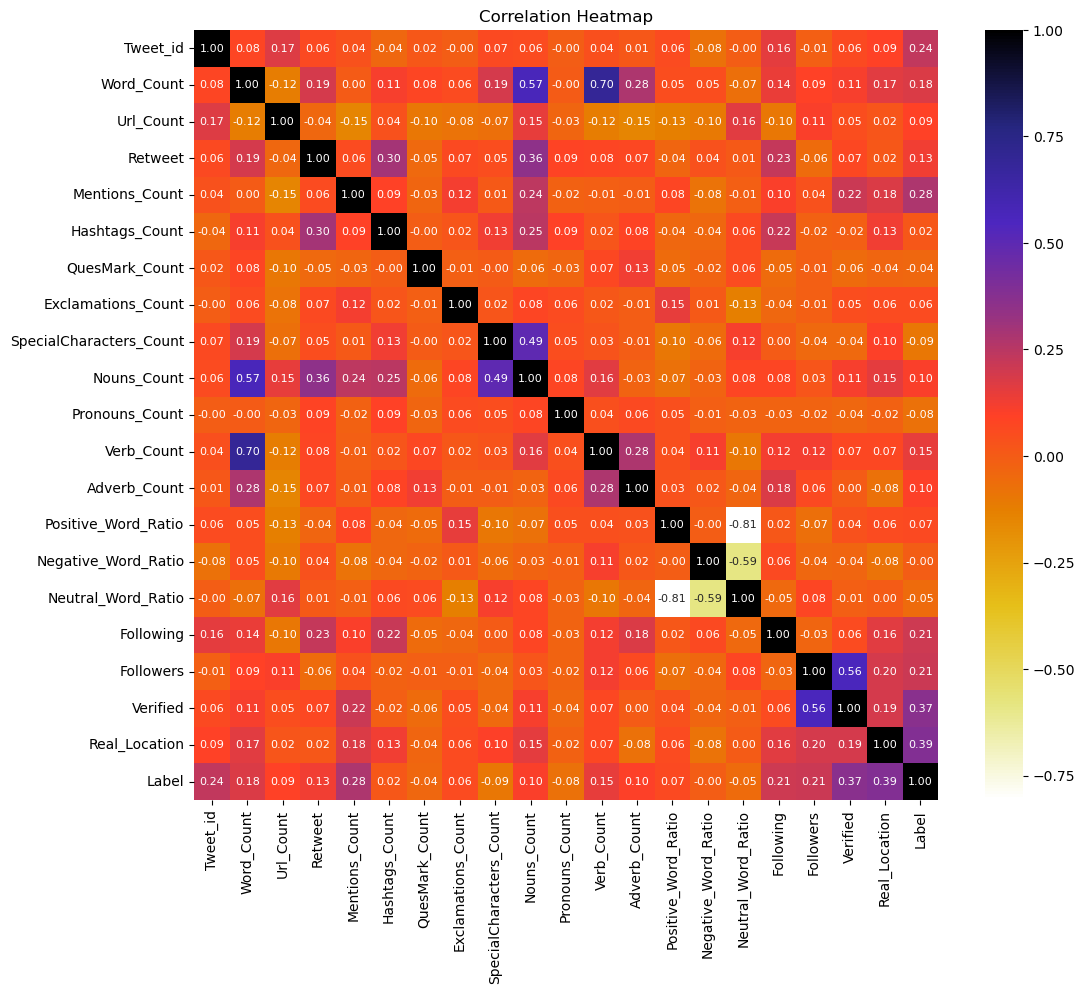

In [97]:
plt.figure(figsize=(12,10))
cor = sml_data.corr()
sns.heatmap(cor, cmap=plt.cm.CMRmap_r, 
            annot=True, 
            fmt='.2f',  # Limit to 2 decimal places
            annot_kws={'size':8},  # Smaller font
            cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [113]:
sml_data = sml_data.drop(columns=['Tweet_id'])
sml_data

Word_Count  Url_Count  Retweet  Mentions_Count  Hashtags_Count  \
0            11          0        0               1               0   
1            13          0        0               0               0   
2            12          1        1               0               1   
3             2          1        0               1               0   
4            21          1        1               0               0   
..          ...        ...      ...             ...             ...   
495          11          1        0               2               0   
496           8          0        0               1               0   
497           5          0        0               1               0   
498          11          2        1               2               1   
499          16          0        1               0               3   

     QuesMark_Count  Exclamations_Count  SpecialCharacters_Count  Nouns_Count  \
0                 0                   0                        1            4   
1                 1                   0                        1            4   
2                 0                   0                        6           10   
3                 0                   0                        1            3   
4                 0                   0                        6           15   
..              ...                 ...                      ...          ...   
495               0                   0                        2           10   
496               0                   0                        1            2   
497               1                   0                        2            4   
498               0                   0                        9           14   
499               0                   1                       13           11   

     Pronouns_Count  Verb_Count  Adverb_Count  Positive_Word_Ratio  \
0                 0           3             1             0.083333   
1                 0           1             0             0.000000   
2                 0           1             0             0.000000   
3                 0           0             0             0.000000   
4                 0           1             0             0.071429   
..              ...         ...           ...                  ...   
495               0           2             0             0.000000   
496               0           1             0             0.222222   
497               0           1             0             0.000000   
498               0           0             0             0.000000   
499               0           1             0             0.000000   

     Negative_Word_Ratio  Neutral_Word_Ratio  Following  Followers  Verified  \
0               0.000000            0.916667         13    9400000         1   
1               0.000000            1.000000       1440       2420         0   
2               0.150000            0.850000          2        594         0   
3               0.000000            1.000000          2       2828         0   
4               0.035714            0.892857       1817        963         0   
..                   ...                 ...        ...        ...       ...   
495             0.000000            1.000000       1974       5674         0   
496             0.000000            0.777778      20500      30100         0   
497             0.000000            1.000000        941      21200         0   
498             0.000000            1.000000          2        594         0   
499             0.071429            0.928571          2        594         0   

     Real_Location  Label  
0              1.0      1  
1             -1.0      1  
2              0.0      0  
3              0.0      0  
4              1.0      1  
..             ...    ...  
495           -1.0      1  
496            1.0      1  
497            0.0      1  
498            0.0      0  
499            0.0      0  

[476 rows x 20 columns]

Correlated Features: {'Neutral_Word_Ratio'}
Original DataFrame shape: (476, 21)
Reduced DataFrame shape: (476, 20)


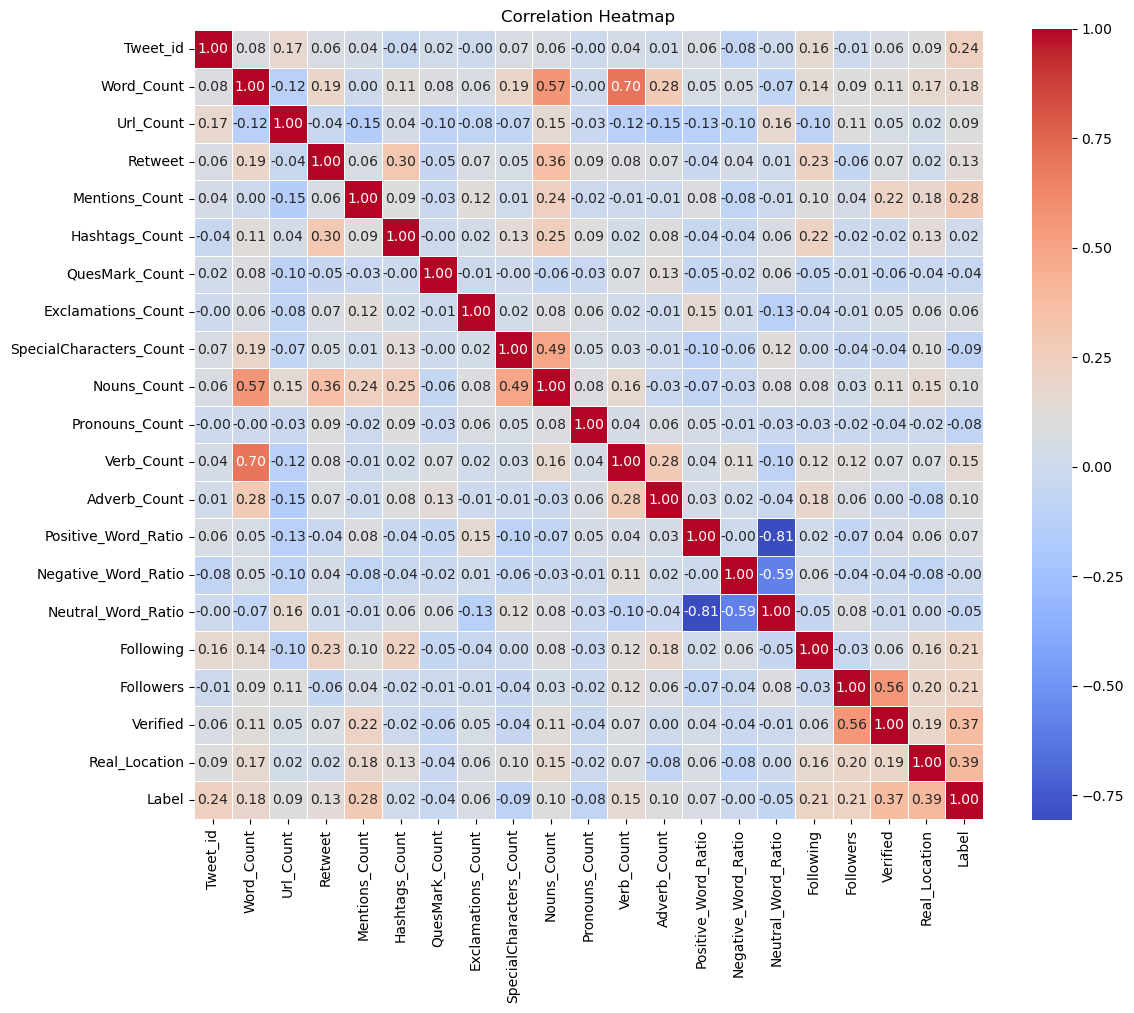

In [109]:
def identify_multicollinearity(df, threshold=0.75):
    # Ensure we're only looking at numeric columns
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Create correlation matrix for numeric columns
    corr_matrix = df[numeric_cols].corr()
    
    # Set to store correlated features
    correlated_features = set()
    
    # Iterate through correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # Check if absolute correlation exceeds threshold
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                correlated_features.add(colname)
    
    return correlated_features
# Identify multicollinear features
multi_col_features = identify_multicollinearity(sml_data)
# Print correlated features
print("Correlated Features:", multi_col_features)
# Optional: Drop correlated features
sml_data_reduced = sml_data.drop(columns=list(multi_col_features))
# Optional: Print shape before and after
print("Original DataFrame shape:", sml_data.shape)
print("Reduced DataFrame shape:", sml_data_reduced.shape)
# Optional: Visualize correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(sml_data[sml_data.select_dtypes(include=['float64', 'int64']).columns].corr(), 
            annot=True, 
            cmap='coolwarm', 
            linewidths=0.5,
            fmt=".2f",
            square=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

Followers                  0.528963
Following                  0.473085
Real_Location              0.107367
Verified                   0.077472
Mentions_Count             0.051357
Hashtags_Count             0.044875
Retweet                    0.042669
Nouns_Count                0.040378
Word_Count                 0.029708
Negative_Word_Ratio        0.029165
Pronouns_Count             0.028194
Verb_Count                 0.027717
Url_Count                  0.016853
SpecialCharacters_Count    0.016008
Adverb_Count               0.000000
Positive_Word_Ratio        0.000000
Neutral_Word_Ratio         0.000000
Exclamations_Count         0.000000
QuesMark_Count             0.000000
dtype: float64


/var/folders/z7/j9rhznl118zbt_41ygz3rgyc0000gn/T/ipykernel_30102/907801938.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sml_data['Real_Location'].fillna(-1, inplace=True)


<Axes: >

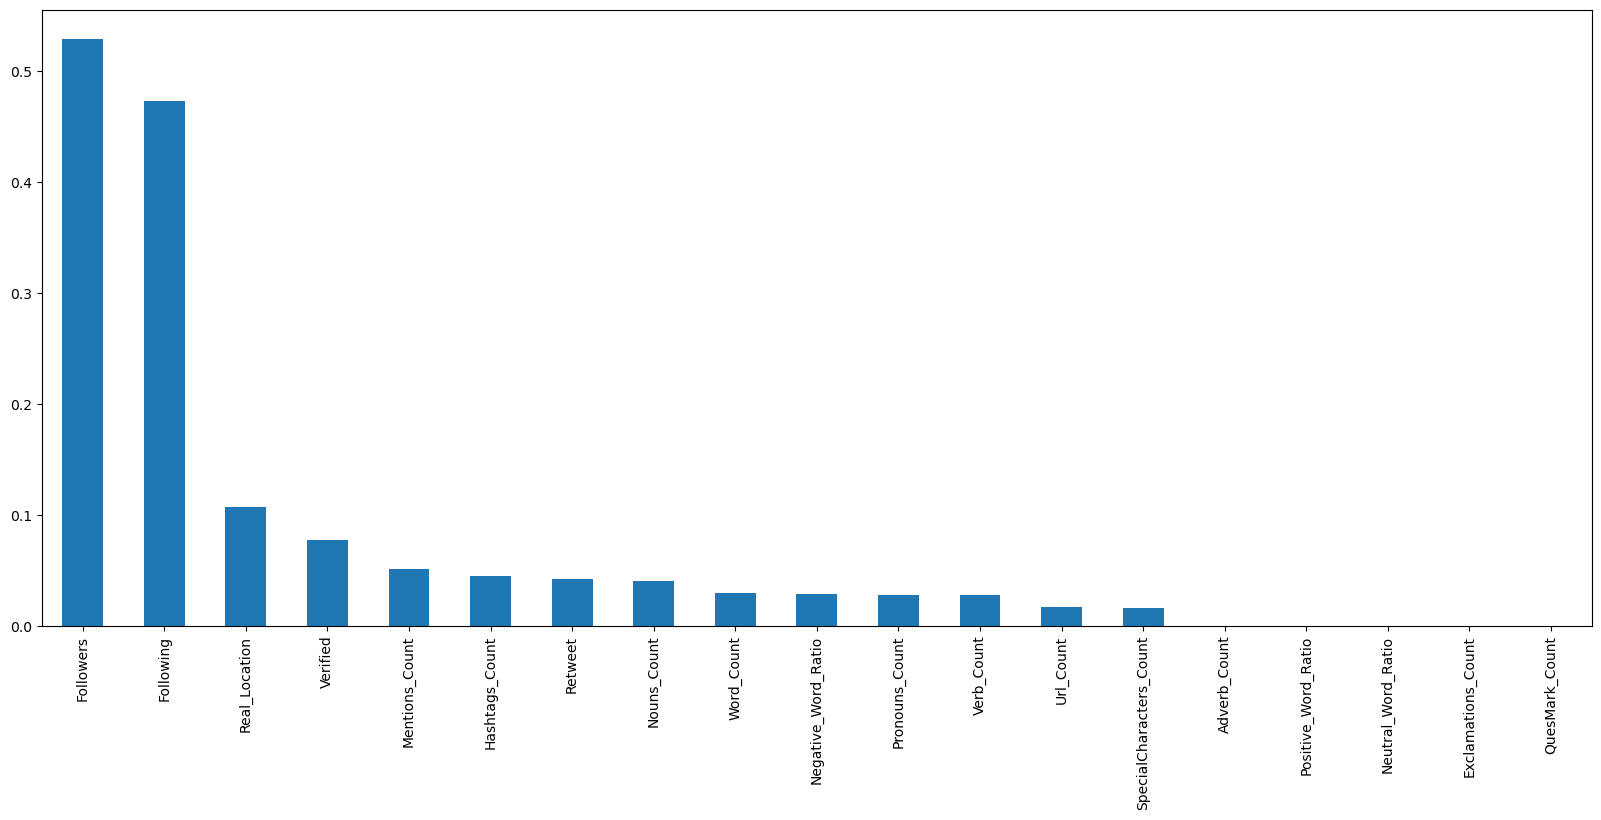

In [ ]:
sml_data['Real_Location'].fillna(-1, inplace=True) #We do not know if location is real or not
X = sml_data.drop(columns=['Label'])
y = sml_data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
print(mutual_info.sort_values(ascending=False))
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

Top 5 Features:
Index(['Mentions_Count', 'Following', 'Followers', 'Verified',
       'Real_Location'],
      dtype='object')

Feature Scores:
Followers         0.555161
Following         0.489552
Verified          0.152757
Real_Location     0.099837
Mentions_Count    0.097063
dtype: float64


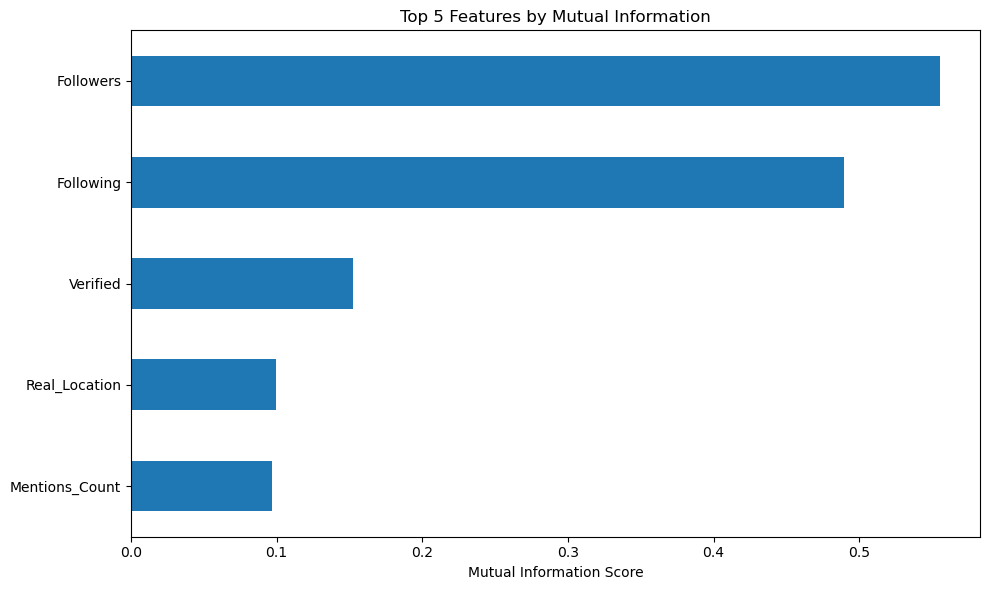

In [146]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
# Prepare the data (if not already done)
X = sml_data.drop(columns=['Label'])
y = sml_data['Label']
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Select top 5 features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
# Get the names of the top 5 features
Top5Features = X_train.columns[sel_five_cols.get_support()]
# Print the top 5 features
print("Top 5 Features:")
print(Top5Features)
# Optional: Get the mutual information scores for these features
feature_scores = pd.Series(sel_five_cols.scores_, index=X_train.columns)
print("\nFeature Scores:")
print(feature_scores[Top5Features].sort_values(ascending=False))
# Visualization of top 5 feature scores
plt.figure(figsize=(10, 6))
feature_scores[Top5Features].sort_values().plot(kind='barh')
plt.title('Top 5 Features by Mutual Information')
plt.xlabel('Mutual Information Score')
plt.tight_layout()
plt.show()

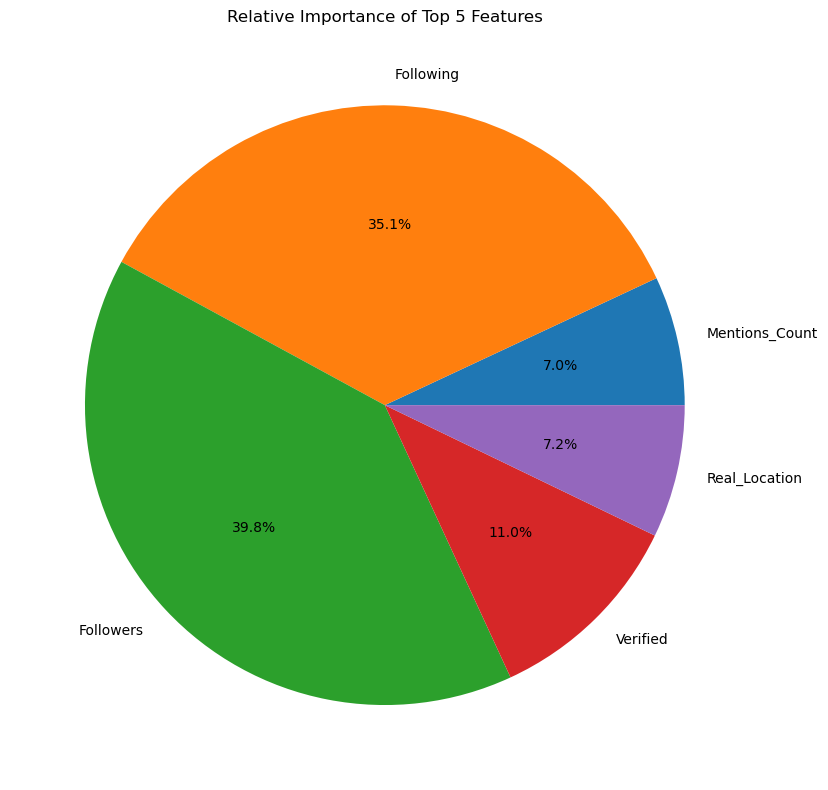


Detailed Feature Importance:
                       Feature  Mutual Information Score
Followers            Followers                  0.555161
Following            Following                  0.489552
Verified              Verified                  0.152757
Real_Location    Real_Location                  0.099837
Mentions_Count  Mentions_Count                  0.097063


In [147]:
# Pie chart of feature importance
plt.figure(figsize=(10, 8))
plt.pie(feature_scores[Top5Features], labels=Top5Features, autopct='%1.1f%%')
plt.title('Relative Importance of Top 5 Features')
plt.tight_layout()
plt.show()
# Detailed feature importance DataFrame
feature_importance = pd.DataFrame({
    'Feature': Top5Features,
    'Mutual Information Score': feature_scores[Top5Features]
})
feature_importance = feature_importance.sort_values('Mutual Information Score', ascending=False)
print("\nDetailed Feature Importance:")
print(feature_importance)

In [ ]:
# -------------------------------------------------
# Dropping Constant features and non-numeric values
# -------------------------------------------------

TheRealData = TwitterData_Joined.copy()

TheRealData = TheRealData.select_dtypes(include=['int64', 'float64'])
constant_columns = TheRealData.columns[TheRealData.nunique() == 1]
TheRealData = TheRealData.drop(columns=constant_columns)


TheRealData

In [139]:
# Kolonner, der droppes baseret på irrelevans eller sparsomme data
columns_to_keep = ['Label', 'Followers', 'Following', 'Verified', 'Real_Location']

# only select the wanted columns
data = data[columns_to_keep]

# Splitting features og target
X = data.drop(columns=["Label"])  # Features
y = data["Label"]  # Target

# Håndtering af manglende værdier
# "Tweet_text" bør ikke udfyldes som <missing>, da det altid har værdi
X.fillna({"Twitter_User_Description": "<missing>"}, inplace=True)  # Beskrivelsen kan være relevant
X.fillna(0, inplace=True)  # Udfyld resten af de numeriske værdier med 0

# Identificer kategoriske kolonner
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Skaler numeriske kolonner
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Kolonnetransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Split datasæt
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialiser modeller
models = {
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "XGBoost": xgb.XGBClassifier(eval_metric='logloss')
}

results = {}
trained_models = {}  # Dictionary to store the actual trained models

# Training & Hyperparameter tuning
for name, model in models.items():
    print(f"Training {name}...")

    # Transform features
    X_train_transformed = preprocessor.fit_transform(X_train)
    X_val_transformed = preprocessor.transform(X_val)

    # Hyperparameter tuning for Random Forest and XGBoost
    if name == "Random Forest":
        param_grid = {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train_transformed, y_train)
        trained_models[name] = grid_search.best_estimator_
    elif name == "XGBoost":
        param_grid_xgb = {
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'n_estimators': [50, 100, 200],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0]
        }
        grid_search_xgb = GridSearchCV(model, param_grid_xgb, cv=5, scoring='accuracy')
        grid_search_xgb.fit(X_train_transformed, y_train)
        trained_models[name] = grid_search_xgb.best_estimator_
    else:
        model.fit(X_train_transformed, y_train)
        trained_models[name] = model

    # Store model evaluation metrics
    y_val_pred = trained_models[name].predict(X_val_transformed)
    y_val_proba = trained_models[name].predict_proba(X_val_transformed)[:, 1] if hasattr(trained_models[name], 'predict_proba') else y_val_pred

    results[name] = {
        "Accuracy": accuracy_score(y_val, y_val_pred),
        "Precision": precision_score(y_val, y_val_pred),
        "Recall": recall_score(y_val, y_val_pred),
        "F1 Score": f1_score(y_val, y_val_pred),
        "ROC AUC": roc_auc_score(y_val, y_val_proba)
    }

# Evaluér på test-sæt
best_model_name = max(results, key=lambda k: results[k]['Accuracy'])
best_model = trained_models[best_model_name]  # Retrieve the actual best model
X_test_transformed = preprocessor.transform(X_test)
y_test_pred = best_model.predict(X_test_transformed)
y_test_proba = best_model.predict_proba(X_test_transformed)[:, 1] if hasattr(best_model, 'predict_proba') else y_test_pred

print("\nFinal Evaluation on Test Set:")
print(f"Best Model: {best_model_name}")
print(classification_report(y_test, y_test_pred))
print(f"Test Set ROC AUC: {roc_auc_score(y_test, y_test_proba):.4f}")

# Print results for all models
for name, metrics in results.items():
    print(f"\n{name}")
    for metric, score in metrics.items():
        print(f"{metric}: {score:.4f}")



Training Random Forest...
Training XGBoost...

Final Evaluation on Test Set:
Best Model: Random Forest
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       357
           1       0.96      1.00      0.98       393

    accuracy                           0.98       750
   macro avg       0.98      0.98      0.98       750
weighted avg       0.98      0.98      0.98       750

Test Set ROC AUC: 0.9986

Random Forest
Accuracy: 0.9880
Precision: 0.9781
Recall: 1.0000
F1 Score: 0.9889
ROC AUC: 0.9992

XGBoost
Accuracy: 0.9880
Precision: 0.9781
Recall: 1.0000
F1 Score: 0.9889
ROC AUC: 0.9992


In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 20383 to 235336
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Label          5000 non-null   int64  
 1   Followers      5000 non-null   int64  
 2   Following      5000 non-null   int64  
 3   Verified       5000 non-null   int64  
 4   Real_Location  5000 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 234.4 KB


In [141]:
data2 = pd.read_csv("hf://datasets/airt-ml/twitter-human-bots/twitter_human_bots_dataset.csv")
data2 = data2.sample(n=5000, random_state=42)

data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 36730 to 26157
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    5000 non-null   int64  
 1   created_at                    5000 non-null   object 
 2   default_profile               5000 non-null   bool   
 3   default_profile_image         5000 non-null   bool   
 4   description                   4036 non-null   object 
 5   favourites_count              5000 non-null   int64  
 6   followers_count               5000 non-null   int64  
 7   friends_count                 5000 non-null   int64  
 8   geo_enabled                   5000 non-null   bool   
 9   id                            5000 non-null   int64  
 10  lang                          3944 non-null   object 
 11  location                      5000 non-null   object 
 12  profile_background_image_url  4412 non-null   object 
 13  pro

In [142]:
# Vælg og omdøb relevante kolonner
data2_prepared = data2[['followers_count', 'friends_count', 'verified', 'account_type', 'geo_enabled']].copy()
# Omdøb kolonner for at matche det originale datasæt
data2_prepared.columns = ['Followers', 'Following', 'Verified', 'Label', 'Real_Location']
# Konverter Verified til 0 og 1
data2_prepared['Verified'] = data2_prepared['Verified'].astype(int)
# Konverter Label til 0 og 1 (antager at 'bot' er 0)
data2_prepared['Label'] = (data2_prepared['Label'] == 'human').astype(int)
# Tilføj Real_Location kolonnen med en standardværdi
data2_prepared['Real_Location'] = data2_prepared['Real_Location'].astype(int)

# Vælg de ønskede kolonner i den rigtige rækkefølge
columns_to_keep = ['Label', 'Followers', 'Following', 'Verified', 'Real_Location']
data2_prepared = data2_prepared[columns_to_keep]

In [143]:
data2_prepared.head()

Label  Followers  Following  Verified  Real_Location
36730      0         42          0         0              0
25960      0        264        345         0              0
12307      1       1625        709         0              0
27357      0         65          0         0              1
7249       1       1827        764         0              1

In [144]:
# Forbered test data (data2_prepared)
X_test_external = data2_prepared.drop(columns=["Label"])
# Transformer test data med den samme preprocessor
X_test_external_transformed = preprocessor.transform(X_test_external)
# Brug den bedste model til at forudsige
y_test_external_pred = best_model.predict(X_test_external_transformed)
y_test_external_proba = best_model.predict_proba(X_test_external_transformed)[:, 1]
# Evaluer performance på det eksterne datasæt
print("\nEvaluering på eksternt test datasæt:")
print(classification_report(data2_prepared['Label'], y_test_external_pred))
print(f"Eksternt test datasæt ROC AUC: {roc_auc_score(data2_prepared['Label'], y_test_external_proba):.4f}")


Evaluering på eksternt test datasæt:
              precision    recall  f1-score   support

           0       0.56      0.75      0.64      1682
           1       0.85      0.70      0.76      3318

    accuracy                           0.71      5000
   macro avg       0.70      0.72      0.70      5000
weighted avg       0.75      0.71      0.72      5000

Eksternt test datasæt ROC AUC: 0.7752


# DATA 2 OLD

In [ ]:
# Forbered data2
data2_prepared = data2[['Tweet', 'Follower Count', 'Verified', 'Bot Label']].copy()
# Omdøb kolonner
data2_prepared.columns = ['Tweet_text', 'Followers', 'Verified', 'Label']
# Konverter Verified til 0 og 1
data2_prepared['Verified'] = data2_prepared['Verified'].astype(int)
# Bytte om på Label-værdierne
data2_prepared['Label'] = 1 - data2_prepared['Label']

# Tilføj Following og Real_Location med standardværdier
data2_prepared['Following'] = -1  # eller gennemsnitsværdi
data2_prepared['Real_Location'] = -1.0

In [96]:
data2_prepared

Tweet_text  Followers  Verified  \
33553  Right collection site require nearly we availa...       7074         1   
9427   Trouble smile factor nice state culture man wi...       6242         0   
199    Quality work finally rule they stage yeah secu...       2553         0   
12447  Draw teach however near question decade reflec...       7752         0   
39489  Voice player management beautiful number durin...       8029         1   
...                                                  ...        ...       ...   
314     Name without hard behavior development act same.       3896         0   
11449  Community wrong drug common heavy consider imp...       6940         0   
30745             Dog age happy light make two fish boy.       7825         1   
29702  Organization among garden billion money I indi...       3083         0   
27658    Current wall bar him Mrs particular experience.       1212         1   

       Label  Following  Real_Location  
33553      0         -1           -1.0  
9427       0         -1           -1.0  
199        1         -1           -1.0  
12447      1         -1           -1.0  
39489      1         -1           -1.0  
...      ...        ...            ...  
314        0         -1           -1.0  
11449      0         -1           -1.0  
30745      1         -1           -1.0  
29702      1         -1           -1.0  
27658      0         -1           -1.0  

[500 rows x 6 columns]

In [48]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(best_model, X_train_transformed, y_train, cv=5, scoring='accuracy')
print(f'Cross-validation scores: {cross_val_scores}')
print(f'Mean cross-validation score: {cross_val_scores.mean()}')


Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation score: 1.0


In [49]:
print(f"Length of features: {len(features)}")
print(f"Length of feature_importances: {len(feature_importances)}")


Length of features: 20
Length of feature_importances: 7020


In [50]:
# Get transformed feature names for OneHotEncoder columns
cat_feature_names = preprocessor.transformers_[1][1].get_feature_names_out(categorical_cols)

# Combine numerical features with encoded categorical feature names
all_feature_names = numerical_cols + list(cat_feature_names)

# Check the lengths
print(f"Length of all features: {len(all_feature_names)}")
print(f"Length of feature_importances: {len(feature_importances)}")

# Now match the features and importances
if hasattr(best_model, 'feature_importances_'):
    feature_importances = best_model.feature_importances_

    # Ensure both lists are of the same length
    importance_df = pd.DataFrame({
        'Feature': all_feature_names,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    print(importance_df)


Length of all features: 3579
Length of feature_importances: 7020
                                                Feature  Importance
3                                        Mentions_Count    0.079669
93    Twitter_User_Description_With algorithms subtl...    0.044698
0                                            Word_Count    0.037850
10                                           Verb_Count    0.034928
15                                             Verified    0.034725
...                                                 ...         ...
1243  Tweet_text_Decoys on proceeds and nodules on r...    0.000000
1244  Tweet_text_Dekh k bolna k mai jhoot bolria ? K...    0.000000
1245  Tweet_text_Deleted a tweet where I thought the...    0.000000
1246  Tweet_text_Dennis Sever's Either/Or collage wh...    0.000000
3578  Tweet_text_you to Donald Rumsfeld for the top ...    0.000000

[3579 rows x 2 columns]


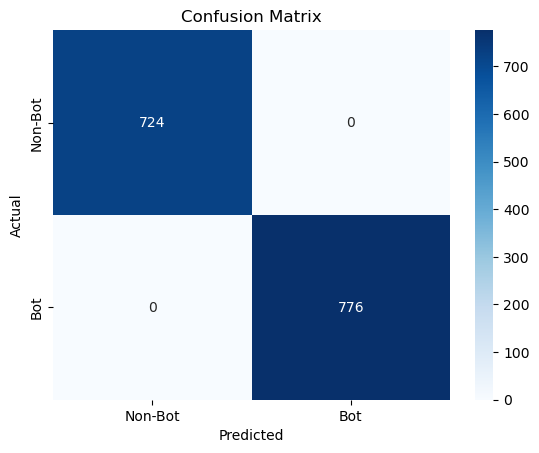

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Bot', 'Bot'], yticklabels=['Non-Bot', 'Bot'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Confusion Matrix (Test Set):
[[724   0]
 [  0 776]]


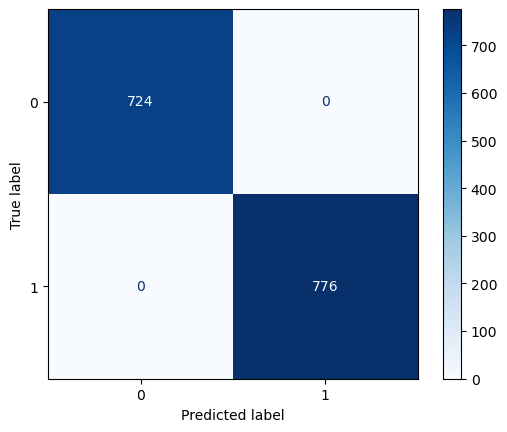

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Beregn confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Visualisér confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap="Blues")

# Udskriv confusion matrix (numerisk)
print("Confusion Matrix (Test Set):")
print(cm)


In [ ]:
data = data.sample(n=2000, random_state=42)

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
)
import pandas as pd
import numpy as np

# Data Preparation
X = data.drop(columns=['Bot Label'])  # Features
y = data['Bot Label']  # Target

# Håndtering af manglende værdier og tidsfunktioner
X['Hashtags'] = X['Hashtags'].fillna('<missing>')
X['Created At'] = pd.to_datetime(X['Created At'])
X['Year'] = X['Created At'].dt.year
X['Month'] = X['Created At'].dt.month
X['Hour'] = X['Created At'].dt.hour

# Drop User ID og Created At (efter at have udledt funktioner)
X = X.drop(columns=['User ID', 'Created At'])

# Identificer kategoriske kolonner
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Skaler numeriske kolonner
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Kolonnetransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Split datasæt
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialiser modeller
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = {}
trained_models = {}  # Dictionary to store the actual trained models

# Training & Hyperparameter tuning
for name, model in models.items():
    print(f"Training {name}...")

    # Transform features
    X_train_transformed = preprocessor.fit_transform(X_train)
    X_val_transformed = preprocessor.transform(X_val)

    # Hyperparameter tuning for Random Forest and XGBoost
    if name == "Random Forest":
        param_grid = {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train_transformed, y_train)
        trained_models[name] = grid_search.best_estimator_
    elif name == "XGBoost":
        param_grid_xgb = {
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'n_estimators': [50, 100, 200],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0]
        }
        grid_search_xgb = GridSearchCV(model, param_grid_xgb, cv=5, scoring='accuracy')
        grid_search_xgb.fit(X_train_transformed, y_train)
        trained_models[name] = grid_search_xgb.best_estimator_
    else:
        model.fit(X_train_transformed, y_train)
        trained_models[name] = model

    # Store model evaluation metrics
    y_val_pred = trained_models[name].predict(X_val_transformed)
    y_val_proba = trained_models[name].predict_proba(X_val_transformed)[:, 1] if hasattr(trained_models[name], 'predict_proba') else y_val_pred

    results[name] = {
        "Accuracy": accuracy_score(y_val, y_val_pred),
        "Precision": precision_score(y_val, y_val_pred),
        "Recall": recall_score(y_val, y_val_pred),
        "F1 Score": f1_score(y_val, y_val_pred),
        "ROC AUC": roc_auc_score(y_val, y_val_proba)
    }

# Evaluér på test-sæt
best_model_name = max(results, key=lambda k: results[k]['Accuracy'])
best_model = trained_models[best_model_name]  # Retrieve the actual best model
X_test_transformed = preprocessor.transform(X_test)
y_test_pred = best_model.predict(X_test_transformed)
y_test_proba = best_model.predict_proba(X_test_transformed)[:, 1] if hasattr(best_model, 'predict_proba') else y_test_pred

print("\nFinal Evaluation on Test Set:")
print(f"Best Model: {best_model_name}")
print(classification_report(y_test, y_test_pred))
print(f"Test Set ROC AUC: {roc_auc_score(y_test, y_test_proba):.4f}")

# Print results for all models
for name, metrics in results.items():
    print(f"\n{name}")
    for metric, score in metrics.items():
        print(f"{metric}: {score:.4f}")


KeyError: "['Bot Label'] not found in axis"

# GPU